In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS (1).csv to IRIS (1).csv


In [3]:
import pandas as pd
df = pd.read_csv("IRIS (1).csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from google.colab import files
uploaded = files.upload()
import os
print("Files in working dir:", os.listdir('.'))

Saving IRIS (1).csv to IRIS (1) (1).csv
Files in working dir: ['.config', 'IRIS (1).csv', 'IRIS (1) (1).csv', 'sample_data']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 200)
%matplotlib inline

In [7]:
fn = "IRIS (1).csv"
df = pd.read_csv(fn)
print("Shape:", df.shape)
display(df.head())
display(df.info())

Shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
target_col = 'species'
X = df.drop(columns=[target_col])
y = df[target_col]

In [11]:
le = LabelEncoder()
y_n = le.fit_transform(y)
print("Classes:", le.classes_)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_n, test_size=0.25, random_state=42, stratify=y_n
)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (112, 4)
Test shape : (38, 4)


In [13]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test  Accuracy:", model.score(X_test, y_test))

Train Accuracy: 0.9642857142857143
Test  Accuracy: 0.8947368421052632


In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8947368421052632

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



In [16]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp

,0
petal_length,0.950732
petal_width,0.049268
sepal_width,0.000000
sepal_length,0.000000


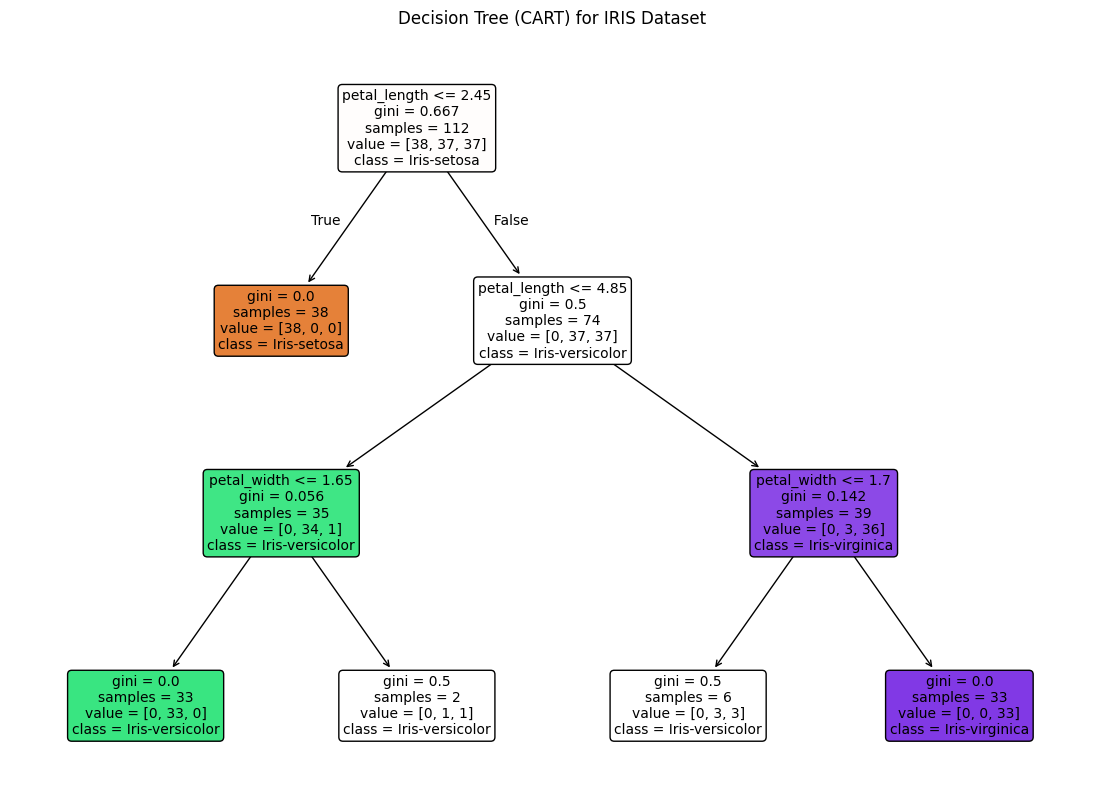

In [17]:
plt.figure(figsize=(14, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (CART) for IRIS Dataset")
plt.show()

In [18]:
rules = export_text(model, feature_names=list(X.columns))
print(rules)

|--- petal_length <= 2.45
|   |--- class: 0
|--- petal_length >  2.45
|   |--- petal_length <= 4.85
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal_width >  1.65
|   |   |   |--- class: 1
|   |--- petal_length >  4.85
|   |   |--- petal_width <= 1.70
|   |   |   |--- class: 1
|   |   |--- petal_width >  1.70
|   |   |   |--- class: 2

